
<a href="https://colab.research.google.com/github/kokchun/Databehandling-AI22/blob/main/Exercises/E00_pandas_basic_syntax.ipynb" target="_parent"><img align="left" src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a> &nbsp; to see hints and answers.

# pandas fundamentals exercises

---
These are introductory exercises in Pandas with focus in **syntax, DataFrame, indexing, data selection** and **data cleaning**.

<p class = "alert alert-info" role="alert"><b>Note</b> that there are usually many ways to achieve same results using operations in pandas. Feel free to investigate several ways. </p>

<p class = "alert alert-info" role="alert"><b>Note</b> that in cases when you start to repeat code, try not to. Create functions to reuse code instead. </p>

<p class = "alert alert-info" role="alert"><b>Remember</b> to use <b>descriptive variable, function, index </b> and <b> column names</b> in order to get readable code </p>

<p class = "alert alert-info" role="alert"><b>Remember</b> to format your input questions in a pedagogical way to guide the user

The number of stars (\*), (\*\*), (\*\*\*) denotes the difficulty level of the task

---

## 1. Cities in Sweden - create dataset (*)

Create this DataFrame from scratch: 

|    | Kommun    |   Population |
|---:|:----------|-------------:|
|  0 | Malmö     |       347949 |
|  1 | Stockholm |       975551 |
|  2 | Uppsala   |       233839 |
|  3 | Göteborg  |       583056 |

&nbsp; a) Use your DataFrame to print out all the cities. (*)

&nbsp; b) Select only the row which contains Göteborg. Do this by using the name Göteborg. (*)

&nbsp; c) Sort the cities by population from largest to smallest. (*)

&nbsp; d) Filter out the three largest cities. (*)

&nbsp; e) The whole population in Sweden 2020 is 10379295. Use this number to create a new column in your sorted DataFrame named: Population (%). This column should be filled with percentage of the Swedish population for each city. 


<details>

<summary>Answer</summary>

a) 

```
0        Malmö
1    Stockholm
2      Uppsala
3     Göteborg
```

b)

|    | Kommun   |   Population |
|---:|:---------|-------------:|
|  3 | Göteborg |       583056 |

c) 

|    | Kommun    |   Population |
|---:|:----------|-------------:|
|  0 | Stockholm |       975551 |
|  1 | Göteborg  |       583056 |
|  2 | Malmö     |       347949 |
|  3 | Uppsala   |       233839 |


d)

|    | Kommun    |   Population |
|---:|:----------|-------------:|
|  0 | Stockholm |       975551 |
|  1 | Göteborg  |       583056 |
|  2 | Malmö     |       347949 |

e)

|    | Kommun    |   Population |   Population (%) |
|---:|:----------|-------------:|-----------------:|
|  0 | Stockholm |       975551 |              9.4 |
|  1 | Göteborg  |       583056 |              5.6 |
|  2 | Malmö     |       347949 |              3.4 |
|  3 | Uppsala   |       233839 |              2.3 |

</details>


In [2]:
import pandas as pd

df_cities = pd.DataFrame([["Malmö", 347949], ["Stockholm", 975551], ["Uppsala", 233839], ["Göteborg", 583056]], columns=["Kommun", "Population"])
df_cities

,Kommun,Population
0,Malmö,347949
1,Stockholm,975551
2,Uppsala,233839
3,Göteborg,583056


In [35]:
# a)
print(df_cities["Kommun"])

0        Malmö
1    Stockholm
2      Uppsala
3     Göteborg
Name: Kommun, dtype: object


In [48]:
# b)
df_cities[df_cities["Kommun"] == "Göteborg"]

,Kommun,Population
3,Göteborg,583056


In [53]:
# c)
cities_sorted = df_cities.sort_values("Population", ascending=False).reset_index(drop=True)
cities_sorted

,Kommun,Population
0,Stockholm,975551
1,Göteborg,583056
2,Malmö,347949
3,Uppsala,233839


In [54]:
# d)
cities_sorted.head(3)

,Kommun,Population
0,Stockholm,975551
1,Göteborg,583056
2,Malmö,347949


In [60]:
# c)
total_population = 10379295
cities_sorted["Population (%)"] = cities_sorted["Population"] / total_population * 100
cities_sorted["Population (%)"] = cities_sorted["Population (%)"].round(2)
cities_sorted

,Kommun,Population,Population (%)
0,Stockholm,975551,9.40
1,Göteborg,583056,5.62
2,Malmö,347949,3.35
3,Uppsala,233839,2.25


---

## 2. Cities in Sweden - real dataset (*)

Download the file komtopp50_2020.xlsx from the course github repo. The data is taken from SCB. 

&nbsp; a) Read in the tab "Totalt" into a DataFrame and start exploring the data with some simple explorations such as

```python
df.head()
df.info()
df.describe()
```

Feel free to do more explorations. (*)

&nbsp; b) Clean your data so that the head looks like this: (*)


|    |   Rang 2020 |   Rang 2019 | Kommun   |   Folkmängd 2020 |   Folkmängd 2019 |   Förändring |
|---:|------------:|------------:|:---------|-----------------:|-----------------:|-------------:|
|  0 |          83 |          84 | Ale      |            31868 |            31402 |     1.48398  |
|  1 |          64 |          64 | Alingsås |            41602 |            41420 |     0.439401 |
|  2 |         123 |         123 | Alvesta  |            20224 |            20134 |     0.447005 |
|  3 |         255 |         255 | Aneby    |             6821 |             6848 |    -0.394276 |
|  4 |         169 |         167 | Arboga   |            14039 |            14087 |    -0.34074  |

&nbsp; c) Sort the cities by population from largest to smallest. (*)

&nbsp; d) Filter out the five smallest cities. (*)

&nbsp; e) Use the DataFrame to calculate Sweden's population in 2019 and 2020. (*)

&nbsp; f) Plot a bar chart for the five largest cities and the five smallest cities. (*) 

<details>

<summary>Hint</summary>

a) Use
```python
pd.read_excel(path, header = ..., usecols="Letter1:LetterN", sheet_name="...")
```

</details>

<details>

<summary>Answer</summary>

b)

|    | Kommun   |   Population |
|---:|:---------|-------------:|
|  3 | Göteborg |       583056 |

c) 


|    |   Rang 2020 |   Rang 2019 | Kommun    |   Folkmängd 2020 |   Folkmängd 2019 |   Förändring |
|---:|------------:|------------:|:----------|-----------------:|-----------------:|-------------:|
|  0 |           1 |           1 | Stockholm |           975551 |           974073 |     0.151734 |
|  1 |           2 |           2 | Göteborg  |           583056 |           579281 |     0.65167  |
|  2 |           3 |           3 | Malmö     |           347949 |           344166 |     1.09918  |
|  3 |           4 |           4 | Uppsala   |           233839 |           230767 |     1.33121  |
|  4 |           5 |           5 | Linköping |           164616 |           163051 |     0.959822 |


d)

|     |   Rang 2020 |   Rang 2019 | Kommun   |   Folkmängd 2020 |   Folkmängd 2019 |   Förändring |
|----:|------------:|------------:|:---------|-----------------:|-----------------:|-------------:|
| 289 |         290 |         290 | Bjurholm |             2387 |             2408 |    -0.872093 |
| 288 |         289 |         289 | Sorsele  |             2442 |             2489 |    -1.88831  |
| 287 |         288 |         288 | Dorotea  |             2498 |             2551 |    -2.07762  |
| 286 |         287 |         287 | Arjeplog |             2718 |             2785 |    -2.40575  |
| 285 |         286 |         286 | Åsele    |             2805 |             2794 |     0.393701 |

e)

```
Populationen i Sverige 2020: 10379295
Populationen i Sverige 2019: 10327589
```

f)

<img align="left" src="../assets/city_sizes.png" height="200"/>

</details>


In [2]:
# a)
import pandas as pd
df = pd.read_excel("../Data/komtopp50_2020.xlsx", skiprows=6)
df.head(10)

,2020,2019,Unnamed: 2,2020.1,2019.1,Unnamed: 5
0,1,1,Stockholm,975551,974073,1478
1,2,2,Göteborg,583056,579281,3775
2,3,3,Malmö,347949,344166,3783
3,4,4,Uppsala,233839,230767,3072
4,5,5,Linköping,164616,163051,1565
5,6,6,Örebro,156381,155696,685
6,7,7,Västerås,155551,154049,1502
7,8,8,Helsingborg,149280,147734,1546
8,9,9,Norrköping,143478,143171,307
9,10,10,Jönköping,142427,141081,1346


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   2020        50 non-null     int64 
 1   2019        50 non-null     int64 
 2   Unnamed: 2  50 non-null     object
 3   2020.1      50 non-null     int64 
 4   2019.1      50 non-null     int64 
 5   Unnamed: 5  50 non-null     int64 
dtypes: int64(5), object(1)
memory usage: 2.5+ KB


In [4]:
df.describe()

,2020,2019,2020.1,2019.1,Unnamed: 5
count,50.00000,50.00000,50.000000,50.000000,50.000000
mean,25.50000,25.50000,124548.940000,123740.320000,808.620000
std,14.57738,14.57738,150014.946636,149527.168738,860.913158
min,1.00000,1.00000,48678.000000,48333.000000,-196.000000
25%,13.25000,13.25000,63751.000000,62911.250000,265.000000
50%,25.50000,25.50000,85573.500000,85071.000000,536.000000
75%,37.75000,37.75000,113594.000000,113096.250000,1111.750000
max,50.00000,50.00000,975551.000000,974073.000000,3783.000000


In [5]:
# b)
print(df.columns)

Index([2020, 2019, 'Unnamed: 2', '2020.1', '2019.1', 'Unnamed: 5'], dtype='object')


In [6]:
df.columns = ["Rang 2020", "Rang 2019", "Kommun", "Folkmängd 2020", "Folkmängd 2019", "Förändring"]
df.head()

,Rang 2020,Rang 2019,Kommun,Folkmängd 2020,Folkmängd 2019,Förändring
0,1,1,Stockholm,975551,974073,1478
1,2,2,Göteborg,583056,579281,3775
2,3,3,Malmö,347949,344166,3783
3,4,4,Uppsala,233839,230767,3072
4,5,5,Linköping,164616,163051,1565


In [10]:
# c)
df_sorted = df.sort_values(by="Folkmängd 2020", ascending=False).head()
df_sorted


,Rang 2020,Rang 2019,Kommun,Folkmängd 2020,Folkmängd 2019,Förändring
0,1,1,Stockholm,975551,974073,1478
1,2,2,Göteborg,583056,579281,3775
2,3,3,Malmö,347949,344166,3783
3,4,4,Uppsala,233839,230767,3072
4,5,5,Linköping,164616,163051,1565


In [12]:
# d)
df_sorted_smallest = df.sort_values(by="Folkmängd 2020", ascending=True)
df_5smallest = df_sorted_smallest.iloc[:5]
df_5smallest

,Rang 2020,Rang 2019,Kommun,Folkmängd 2020,Folkmängd 2019,Förändring
49,50,50,Tyresö,48678,48333,345
48,49,49,Sigtuna,49537,48964,573
47,48,48,Hässleholm,52010,52145,-135
46,47,46,Borlänge,52394,52590,-196
45,46,47,Sundbyberg,52801,52414,387


In [17]:
# e)
print(f"Population i Sverige 2019: {df["Folkmängd 2019"].sum()}")
print(f"Population i Sverige 2019: {df["Folkmängd 2020"].sum()}")

Population i Sverige 2019: 6187016
Population i Sverige 2019: 6227447


C:\Users\mohse\AppData\Local\Temp\ipykernel_14584\3945631398.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=data, x=x_column, y=y_column, ax=axes[i], palette="Set2")
C:\Users\mohse\AppData\Local\Temp\ipykernel_14584\3945631398.py:14: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[i].set_xticklabels(axes[i].get_xticklabels(), rotation=45)
C:\Users\mohse\AppData\Local\Temp\ipykernel_14584\3945631398.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=data, x=x_column, y=y_column, ax=axes[i], palette="Set2")
C:\Users\mohse\AppData\Local\Temp\ipykernel_14584\3945631398.py:14: UserWarning: s

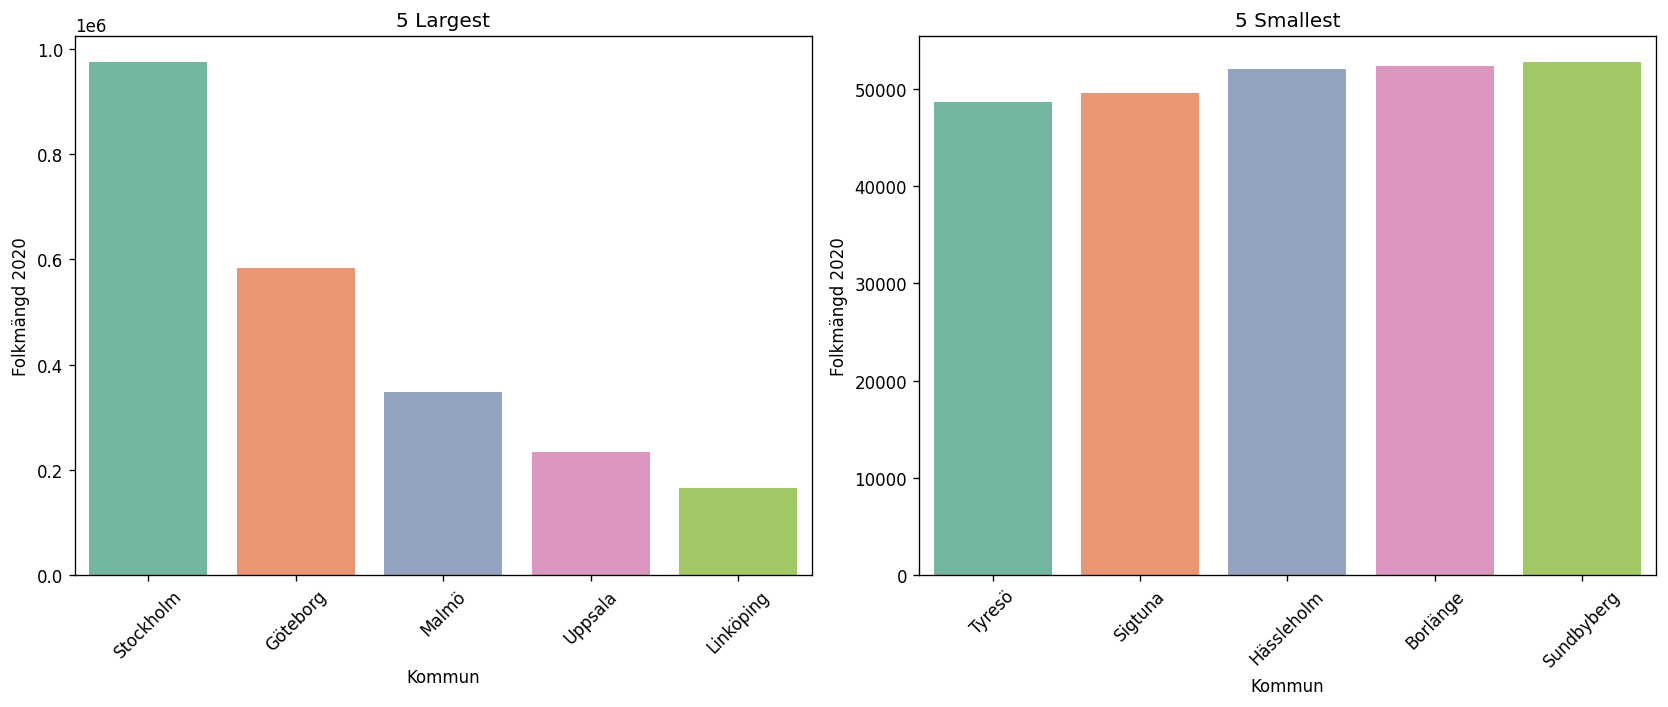

In [32]:
# f)
import matplotlib.pyplot as plt
import seaborn as sns

fig, axes = plt.subplots(1, 2, dpi=120, figsize=(14, 6))
titles = ["5 Largest", "5 Smallest"]
data_frames = [df_sorted, df_5smallest]
x_column = "Kommun"
y_column = "Folkmängd 2020"

for i, (data, title) in enumerate(zip(data_frames, titles)):
    sns.barplot(data=data, x=x_column, y=y_column, ax=axes[i], palette="Set2")
    axes[i].set_title(title)
    axes[i].set_xticklabels(axes[i].get_xticklabels(), rotation=45)

plt.tight_layout()
plt.show()

---

Kokchun Giang

[LinkedIn][linkedIn_kokchun]

[GitHub portfolio][github_portfolio]

[linkedIn_kokchun]: https://www.linkedin.com/in/kokchungiang/
[github_portfolio]: https://github.com/kokchun/Portfolio-Kokchun-Giang

---